In [46]:
import pandas as pd

In [47]:
archivo_csv = r'D:\Tec\7mo Smestre\Inteligencia Artificial II\Reto\Datos\Videos\VolumeTracings.csv'

In [48]:
dfVT = pd.read_csv(archivo_csv)

In [49]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Directorio de las imágenes de máscara
dir_mascaras = r'D:\Tec\7mo Smestre\Inteligencia Artificial II\Reto\Datos\Mascaras\mascaras_train'

# Directorio de las imágenes originales
dir_imagenes = r'D:\Tec\7mo Smestre\Inteligencia Artificial II\Reto\Datos\Imagenes\imagenes_train'

# Listas para almacenar los heatmaps procesados y las imágenes originales
heatmaps = []
imagenes_originales = []

# Tamaño de la imagen
image_size = (112, 112)

# Umbral para binarizar la máscara
threshold = 0.5

# Recorrer todos los archivos en el directorio de máscaras
for archivo_mascara in os.listdir(dir_mascaras):
    ruta_mascara = os.path.join(dir_mascaras, archivo_mascara)

    # Extraer el número de frame de la máscara
    numero_frame = archivo_mascara.split('frame_')[1].split('_mask')[0]

    # Cargar la imagen de la máscara
    mask = cv2.imread(ruta_mascara, cv2.IMREAD_GRAYSCALE)

    # Binarizar la máscara
    mask = np.where(mask >= threshold, 1, 0)

    # Encontrar los contornos en la máscara binarizada
    contours, _ = cv2.findContours((mask * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Crear una imagen en blanco para dibujar los contornos
    contorno_imagen = np.zeros_like(mask)

    # Tipo de dato correcto
    contorno_imagen = contorno_imagen.astype(np.uint8)
    mask = mask.astype(np.uint8)

    # Dibujar los contornos en la imagen en blanco
    contour = cv2.drawContours(contorno_imagen, contours, -1, (255), thickness=1)

    # Extraer el nombre del archivo de la ruta
    nombre_archivo_con_sufijo = os.path.splitext(os.path.basename(ruta_mascara))[0]
    nombre_archivo = nombre_archivo_con_sufijo.split('_frame')[0]

    # Agregar ".avi" al final del nombre de archivo
    nombre_archivo_avi = nombre_archivo + ".avi"

    # Cargar la imagen original con sufijo "_og"
    imagen_filename = archivo_mascara.replace("_mask.png", "_og.png")
    ruta_imagen_original = os.path.join(dir_imagenes, imagen_filename)
    imagen_original = cv2.imread(ruta_imagen_original)

    if imagen_original is not None:
        # Filtrar los puntos correspondientes a esta imagen y número de frame (reemplaza esto con tus datos)
        puntos_imagen = dfVT[(dfVT['FileName'] == nombre_archivo_avi) & (dfVT['Frame'] == int(numero_frame))]

        # Crear un heatmap vacío
        heatmap_7c = np.zeros((image_size[1], image_size[0], 7), dtype=np.float32)

        # Definir los puntos de interés (ajusta esto según tus necesidades)
        puntos_canales = [0, 6, 13, 19]

        if len(puntos_imagen) > 19:

            # Dibujar el primer punto en x1, y1
            x1, y1 = int(puntos_imagen.iloc[puntos_canales[0]]['X1']), int(puntos_imagen.iloc[puntos_canales[0]]['Y1'])
            if 0 <= x1 < image_size[0] and 0 <= y1 < image_size[1]:
                heatmap_7c[y1, x1,0] += 1.0  # Acumula intensidad en el píxel

            # Dibujar el segundo punto en x1, y1 y x2, y2
            x1, y1 = int(puntos_imagen.iloc[puntos_canales[1]]['X1']), int(puntos_imagen.iloc[puntos_canales[1]]['Y1'])
            x2, y2 = int(puntos_imagen.iloc[puntos_canales[1]]['X2']), int(puntos_imagen.iloc[puntos_canales[1]]['Y2'])

            if 0 <= x1 < image_size[0] and 0 <= y1 < image_size[1]:
                heatmap_7c[y1, x1,1] += 1.0  # Acumula intensidad en el píxel

            if 0 <= x2 < image_size[0] and 0 <= y2 < image_size[1]:
                heatmap_7c[y2, x2,2] += 1.0  # Acumula intensidad en el píxel

            # Continuar con los demás puntos de la misma manera
            x1, y1 = int(puntos_imagen.iloc[puntos_canales[2]]['X1']), int(puntos_imagen.iloc[puntos_canales[2]]['Y1'])
            x2, y2 = int(puntos_imagen.iloc[puntos_canales[2]]['X2']), int(puntos_imagen.iloc[puntos_canales[2]]['Y2'])

            if 0 <= x1 < image_size[0] and 0 <= y1 < image_size[1]:
                heatmap_7c[y1, x1,3] += 1.0  # Acumula intensidad en el píxel

            if 0 <= x2 < image_size[0] and 0 <= y2 < image_size[1]:
                heatmap_7c[y2, x2,4] += 1.0  # Acumula intensidad en el píxel

            x1, y1 = int(puntos_imagen.iloc[puntos_canales[3]]['X1']), int(puntos_imagen.iloc[puntos_canales[3]]['Y1'])
            x2, y2 = int(puntos_imagen.iloc[puntos_canales[3]]['X2']), int(puntos_imagen.iloc[puntos_canales[3]]['Y2'])

            if 0 <= x1 < image_size[0] and 0 <= y1 < image_size[1]:
                heatmap_7c[y1, x1,5] += 1.0  # Acumula intensidad en el píxel

            if 0 <= x2 < image_size[0] and 0 <= y2 < image_size[1]:
                heatmap_7c[y2, x2,6] += 1.0  # Acumula intensidad en el píxel

            # Suavizar el heatmap
            heatmap_7c_suavizado = np.zeros_like(heatmap_7c)

            for canal in range(7):
                heatmap_canal = heatmap_7c[:, :, canal]
                heatmap_canal_suavizado = cv2.GaussianBlur(heatmap_canal, (0, 0), sigmaX=3, sigmaY=3)
                heatmap_7c_suavizado[:, :, canal] = heatmap_canal_suavizado

            # Crear un array para almacenar las imágenes normalizadas de cada canal
            normalized_heatmaps = []

            # Crear un array para almacenar las imágenes máscaras de cada canal
            masked_heatmaps = []

            # Normalizar y aplicar el contorno como máscara a cada canal
            for canal in range(7):
                heatmap_canal = heatmap_7c_suavizado[:, :, canal]

                # Normalizar el canal
                normalized_heatmap_canal = ((heatmap_canal - np.min(heatmap_canal)) / (np.max(heatmap_canal) - np.min(heatmap_canal)))

                # Aplicar el contorno como máscara
                masked_heatmap_canal = normalized_heatmap_canal * contour

                normalized_heatmaps.append(normalized_heatmap_canal)
                masked_heatmaps.append(masked_heatmap_canal)

            # Agregar el heatmap procesado a la lista
            heatmaps.append(np.stack(masked_heatmaps, axis=-1))

            imagenes_originales.append(imagen_original)

# Convierte las listas de heatmaps e imágenes originales en arreglos tridimensionales
heatmaps_train = np.array(heatmaps)
imagenes_originales_train = np.array(imagenes_originales)

# A ver si jala
print("Dimensiones de heatmaps_array:", heatmaps_train.shape)
print("Dimensiones de imagenes_originales_array:", imagenes_originales_train.shape)

# %cd 'D:\Tec\7mo Smestre\Inteligencia Artificial II\Reto\Datos\Arrays Heatmaps'

folder = r'D:\Tec\7mo Smestre\Inteligencia Artificial II\Reto\Datos\Arrays Heatmaps\train'

# Guarda los arrays en archivos binarios
np.save(os.path.join(folder, 'heatmaps_train.npy'), heatmaps_train)
np.save(os.path.join(folder, 'imagenes_originales_train.npy'), imagenes_originales_train)


C:\Users\vhae1\AppData\Local\Temp\ipykernel_29052\2285714471.py:125: RuntimeWarning: invalid value encountered in divide
  normalized_heatmap_canal = ((heatmap_canal - np.min(heatmap_canal)) / (np.max(heatmap_canal) - np.min(heatmap_canal)))


Dimensiones de heatmaps_array: (14918, 112, 112, 7)
Dimensiones de imagenes_originales_array: (14918, 112, 112, 3)


In [50]:
print(puntos_imagen)

                     FileName         X1         Y1         X2         Y2  \
424989  0XFEBEEFF93F6FEB9.avi  56.182292  65.479167  60.739583  18.630208   
424990  0XFEBEEFF93F6FEB9.avi  59.339074  19.719493  61.707334  19.949869   
424991  0XFEBEEFF93F6FEB9.avi  57.074362  21.950233  63.642837  22.589190   
424992  0XFEBEEFF93F6FEB9.avi  55.905684  24.287591  65.139635  25.185836   
424993  0XFEBEEFF93F6FEB9.avi  54.945050  26.645187  66.050060  27.725441   
424994  0XFEBEEFF93F6FEB9.avi  54.001353  29.004431  66.960484  30.265046   
424995  0XFEBEEFF93F6FEB9.avi  53.057655  31.363674  67.870909  32.804652   
424996  0XFEBEEFF93F6FEB9.avi  52.220080  33.733240  68.414225  35.308546   
424997  0XFEBEEFF93F6FEB9.avi  51.403620  36.104861  68.736011  37.790891   
424998  0XFEBEEFF93F6FEB9.avi  50.587161  38.476481  69.057796  40.273236   
424999  0XFEBEEFF93F6FEB9.avi  49.770701  40.848102  69.379581  42.755581   
425000  0XFEBEEFF93F6FEB9.avi  48.965212  43.220790  69.563234  45.224488   

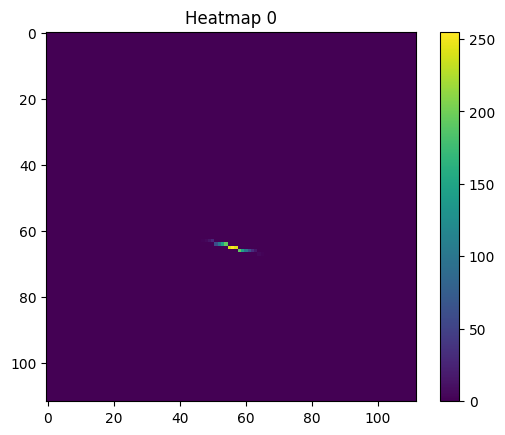

In [51]:
# Visualizar un heatmap después de procesar cada imagen
canal = 0
plt.imshow(masked_heatmaps[canal])
plt.title(f'Heatmap {canal}')
plt.colorbar()
plt.show()

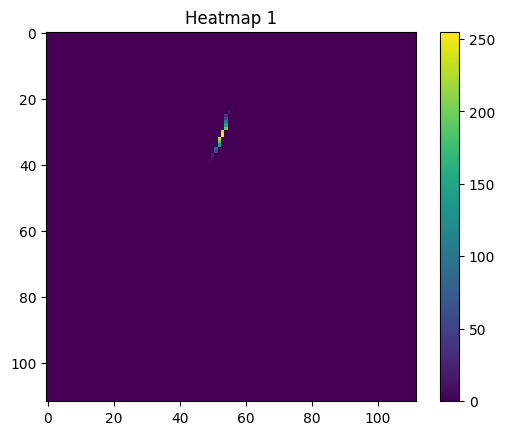

In [52]:
# Visualizar un heatmap después de procesar cada imagen
canal = 1
plt.imshow(masked_heatmaps[canal])
plt.title(f'Heatmap {canal}')
plt.colorbar()
plt.show()

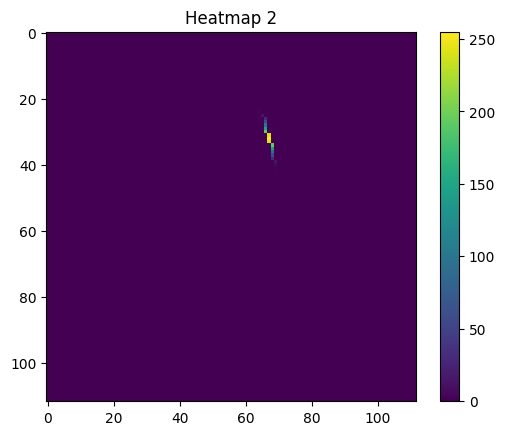

In [53]:
# Visualizar un heatmap después de procesar cada imagen
canal = 2
plt.imshow(masked_heatmaps[canal])
plt.title(f'Heatmap {canal}')
plt.colorbar()
plt.show()

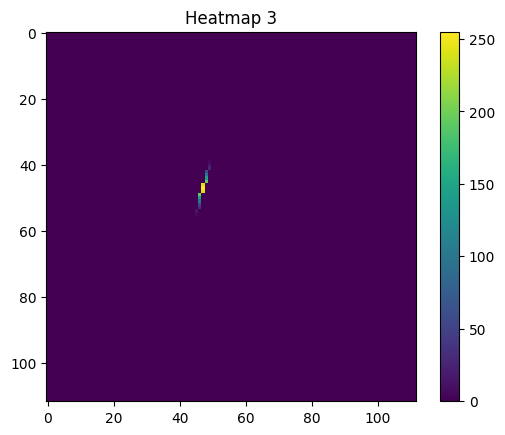

In [54]:
# Visualizar un heatmap después de procesar cada imagen
canal = 3
plt.imshow(masked_heatmaps[canal])
plt.title(f'Heatmap {canal}')
plt.colorbar()
plt.show()

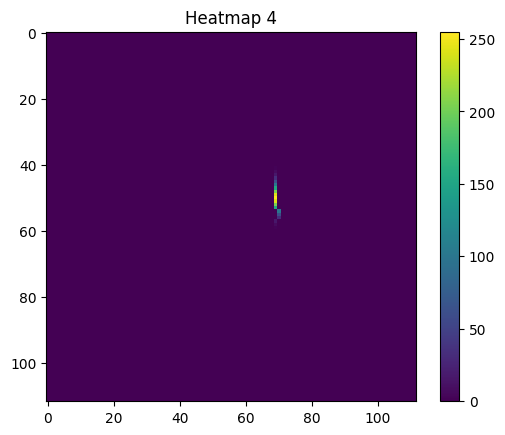

In [55]:
# Visualizar un heatmap después de procesar cada imagen
canal = 4
plt.imshow(masked_heatmaps[canal])
plt.title(f'Heatmap {canal}')
plt.colorbar()
plt.show()

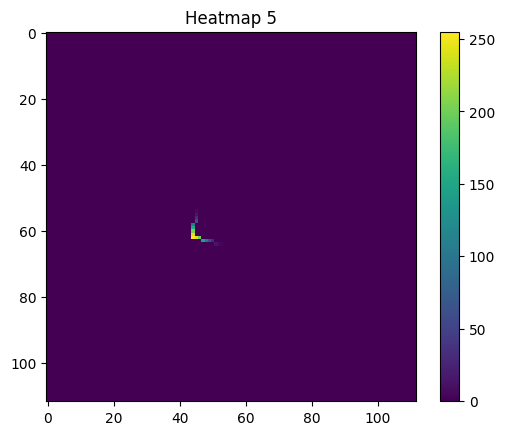

In [56]:
# Visualizar un heatmap después de procesar cada imagen
canal = 5
plt.imshow(masked_heatmaps[canal])
plt.title(f'Heatmap {canal}')
plt.colorbar()
plt.show()

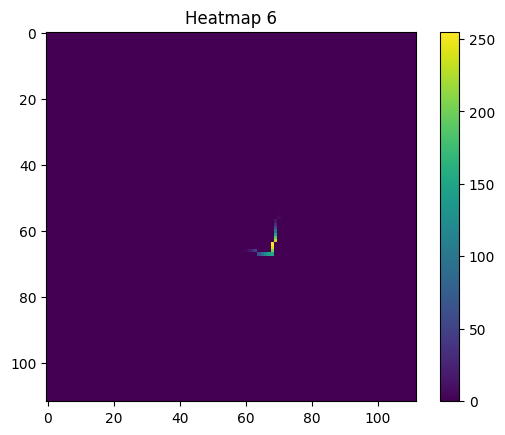

In [57]:
# Visualizar un heatmap después de procesar cada imagen
canal = 6
plt.imshow(masked_heatmaps[canal])
plt.title(f'Heatmap {canal}')
plt.colorbar()
plt.show()